In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.expand_frame_repr', True)

In [3]:
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import datetime
import warnings
warnings.filterwarnings('ignore')

In [6]:
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 4)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 8
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = False
rcParams['axes.facecolor'] = '#eeeeee'

### Data

In [7]:
train_X = pd.read_csv('train_x.csv')
train_y = pd.read_csv('train_y.csv')

train = train_X.merge(train_y, on='ID', how='left')

test = pd.read_csv('test_x.csv')

In [8]:
test.rename(columns={'ID_Test':'ID'},inplace=True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 0 to 79999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               80000 non-null  int64  
 1   Expense          77956 non-null  float64
 2   Income           78045 non-null  float64
 3   Loan type        77989 non-null  object 
 4   Occupation type  78141 non-null  object 
 5   Age              77986 non-null  float64
 6   Score1           78060 non-null  float64
 7   Score2           77964 non-null  float64
 8   Score3           78045 non-null  float64
 9   Score4           78028 non-null  float64
 10  Score5           78002 non-null  float64
 11  Label            76097 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 7.9+ MB


In [10]:
train.isna().sum()

ID                    0
Expense            2044
Income             1955
Loan type          2011
Occupation type    1859
Age                2014
Score1             1940
Score2             2036
Score3             1955
Score4             1972
Score5             1998
Label              3903
dtype: int64

## Data Visualizations

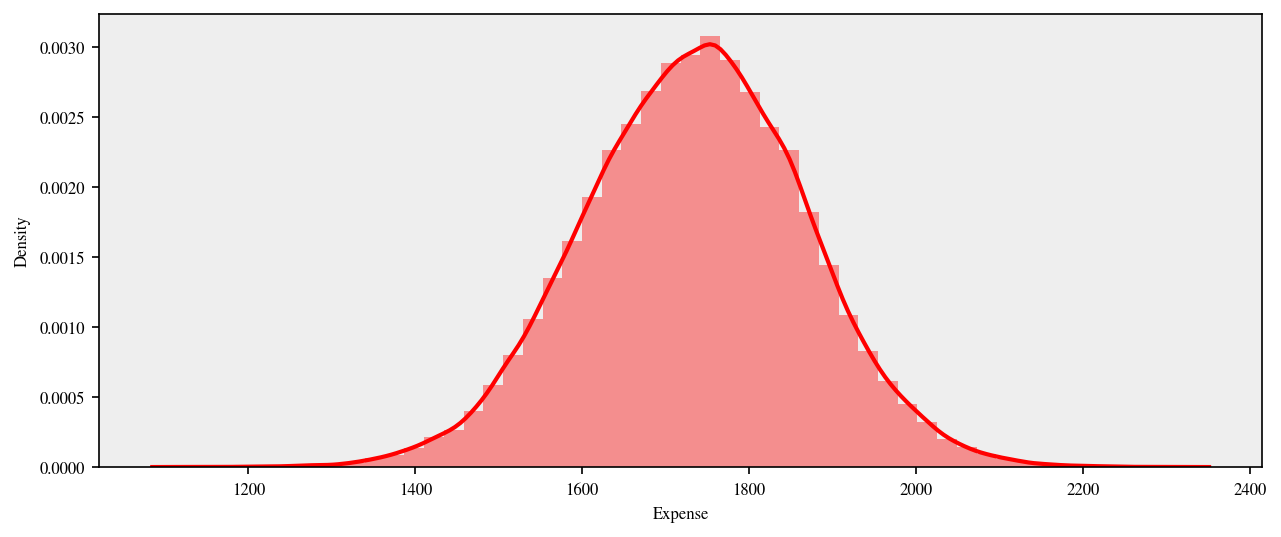

In [11]:
sns.distplot(train['Expense'],hist=True,color='red')

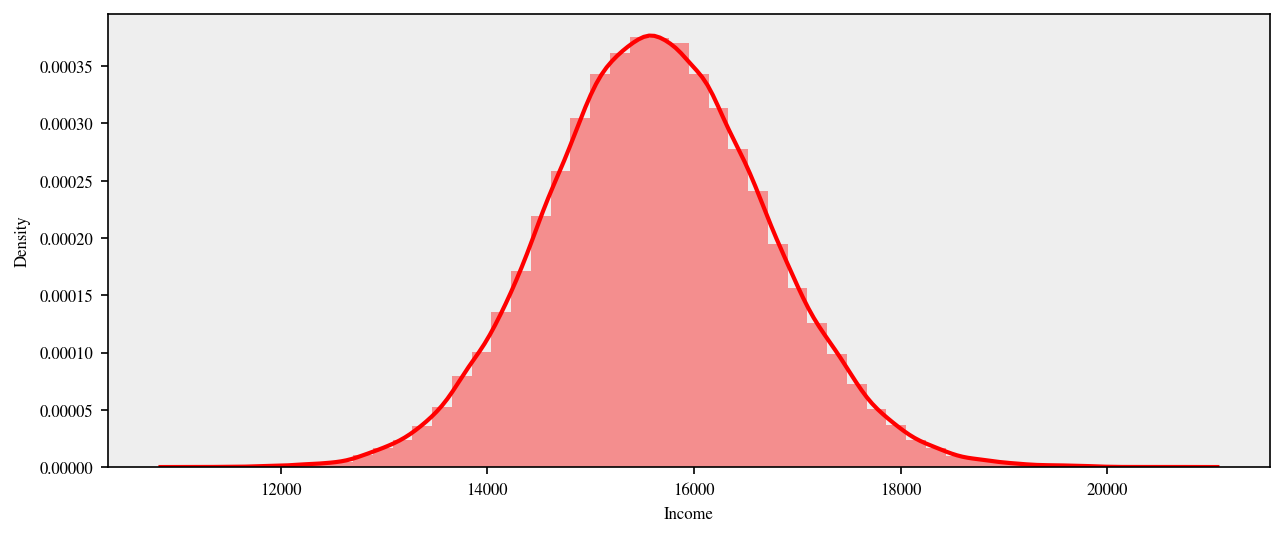

In [ ]:
sns.distplot(train['Income'],hist=True,color='red')

Age group '0.0' are more preferring **Loan A** , Whereas Age group '1.0' are prefering **Loan B**

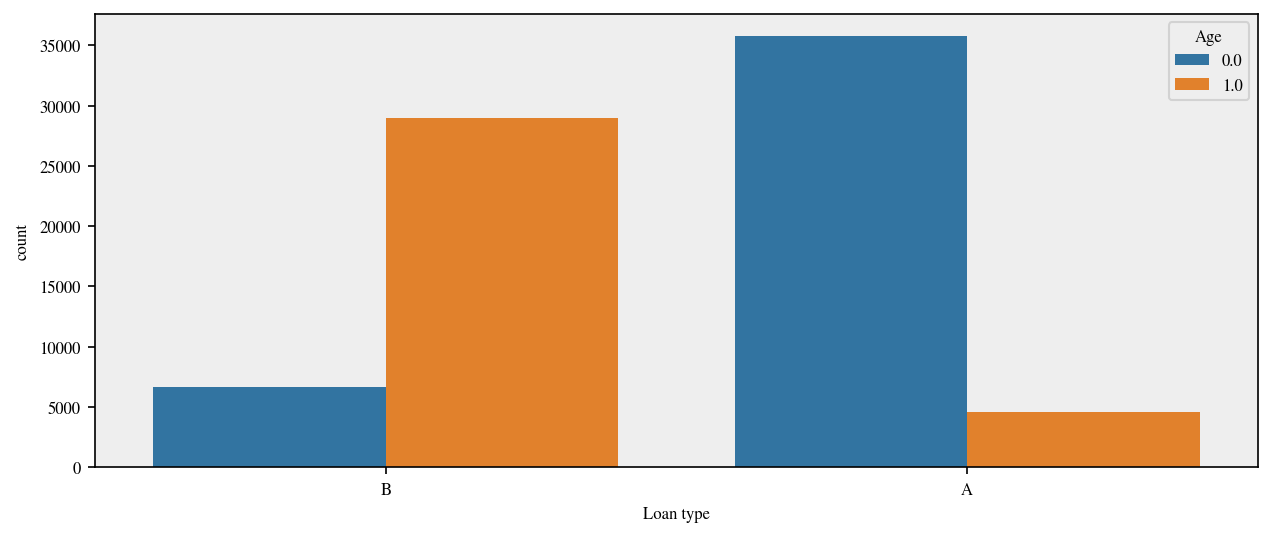

In [ ]:
sns.countplot(x='Loan type',hue='Age',data=train)

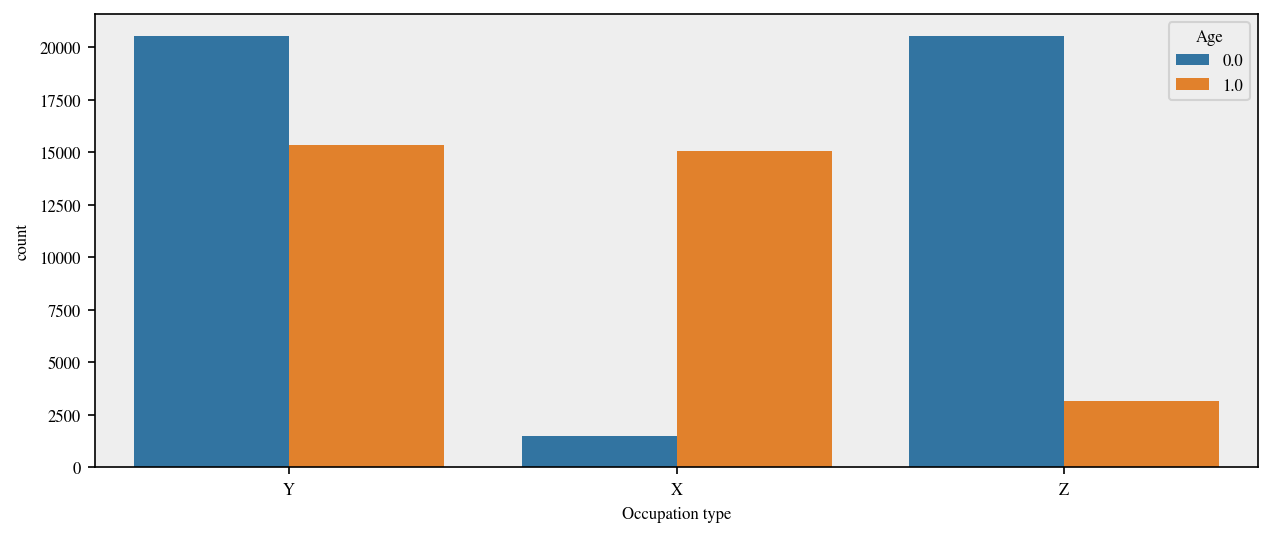

In [ ]:
sns.countplot(x='Occupation type',hue='Age',data=train)

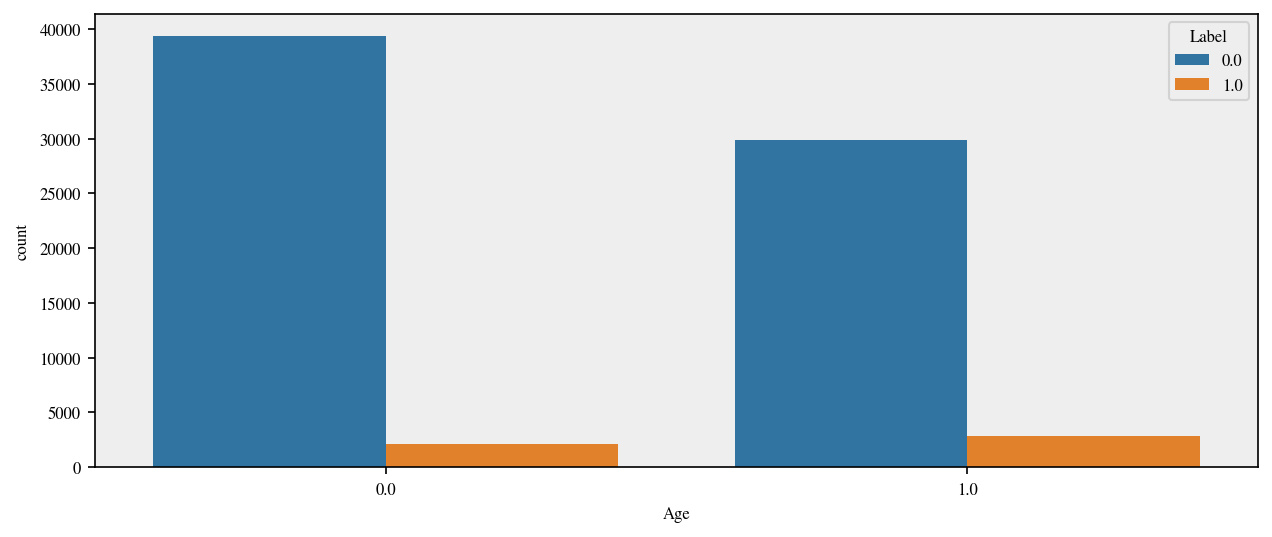

In [ ]:
sns.countplot(x='Age',hue='Label',data=train)

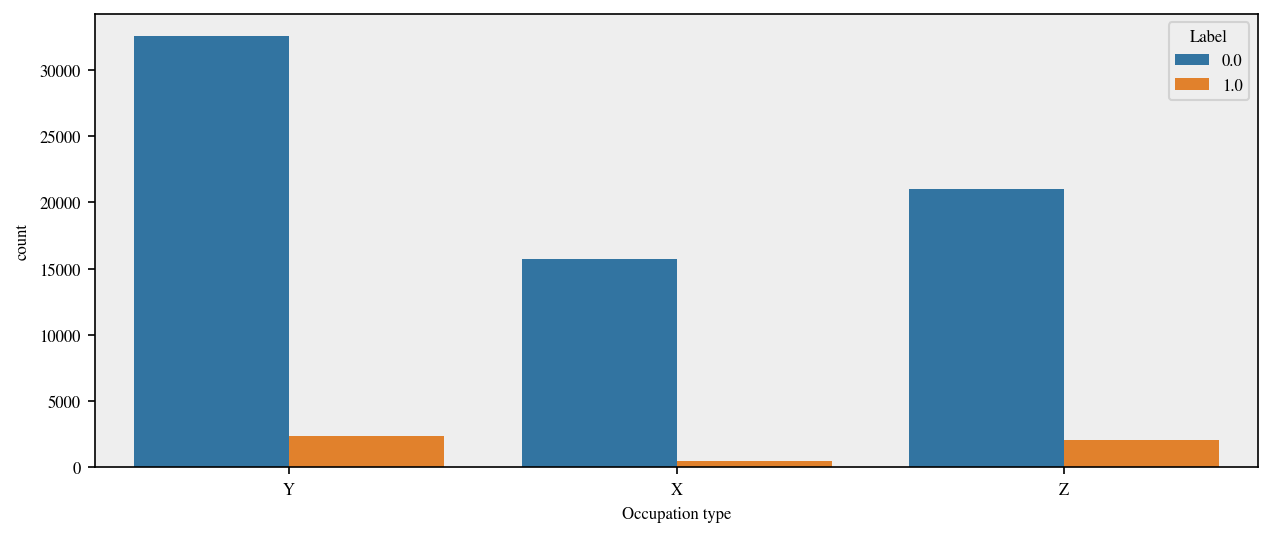

In [ ]:
sns.countplot(x='Occupation type',hue='Label',data=train)

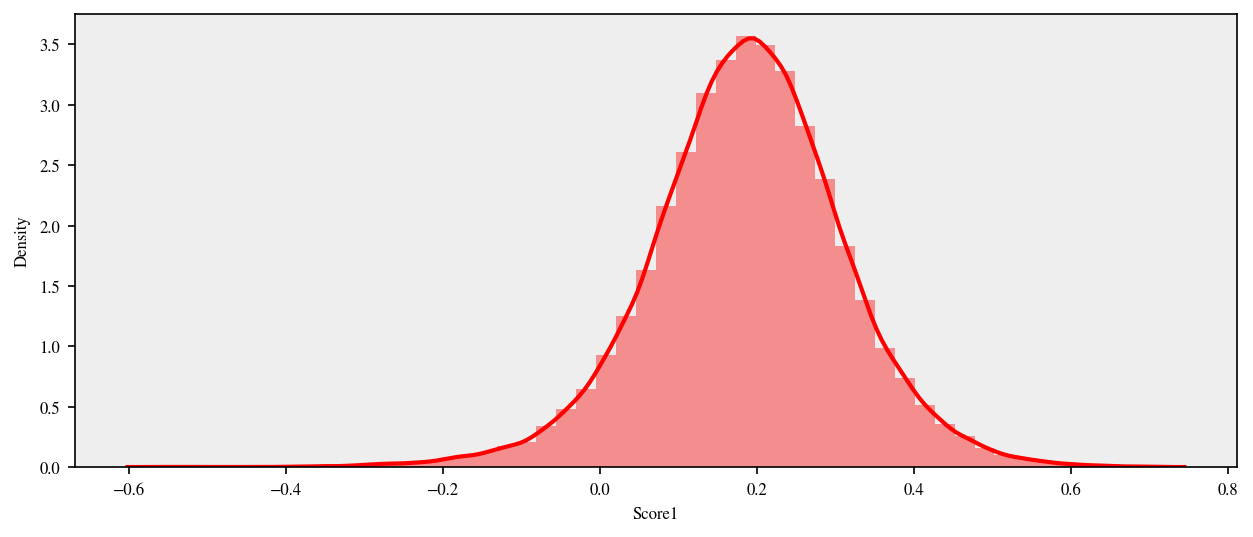

In [ ]:
sns.distplot(train['Score1'],hist=True,color='red')

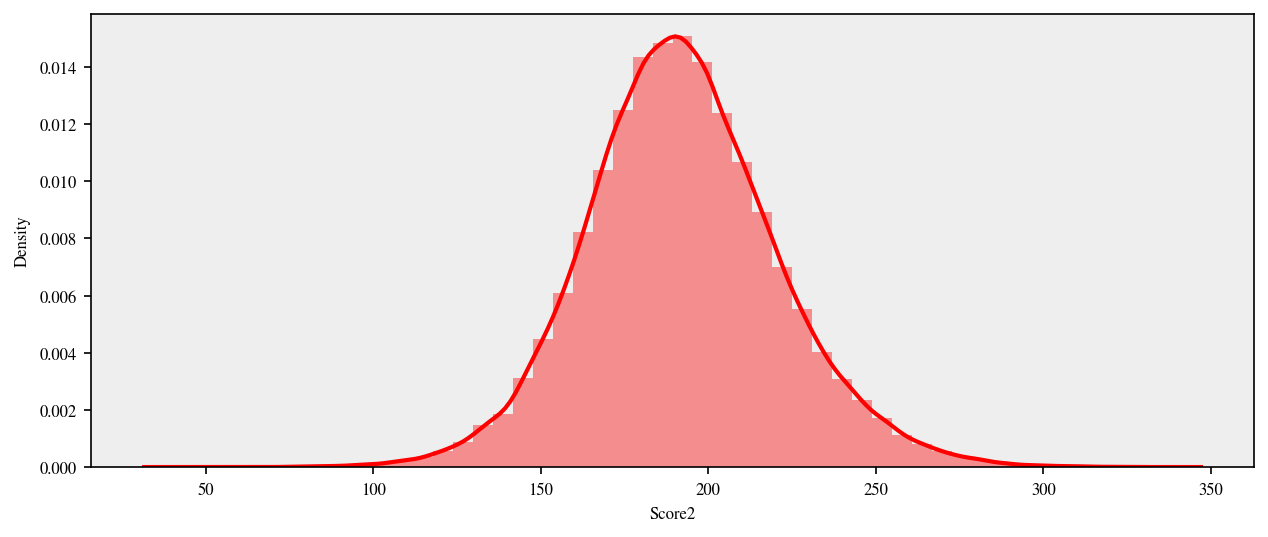

In [ ]:
sns.distplot(train['Score2'],hist=True,color='red')

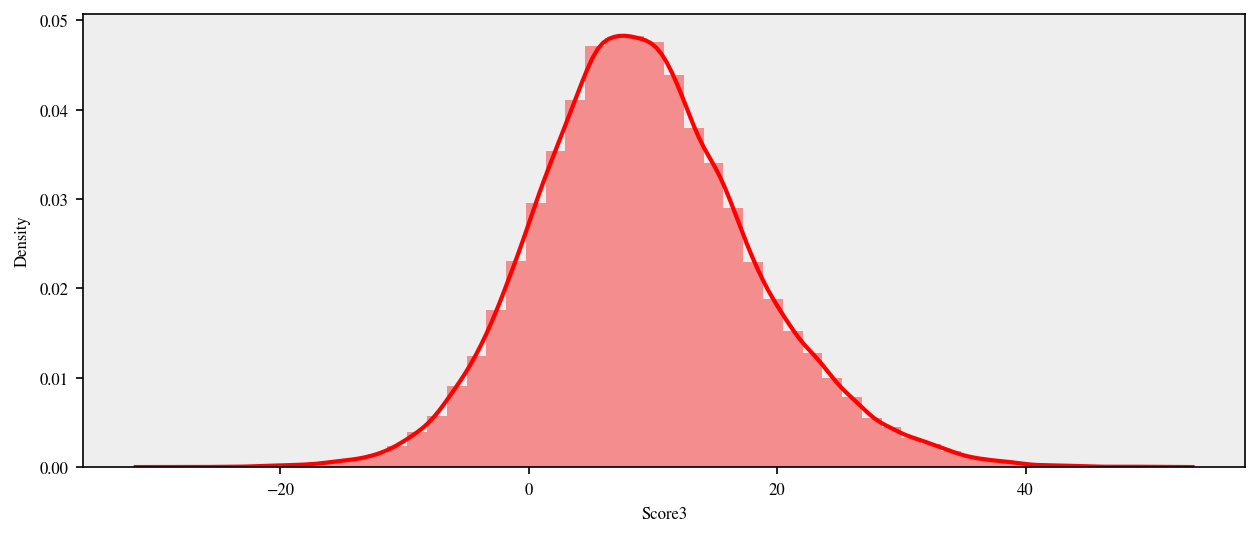

In [ ]:
sns.distplot(train['Score3'],hist=True,color='red')

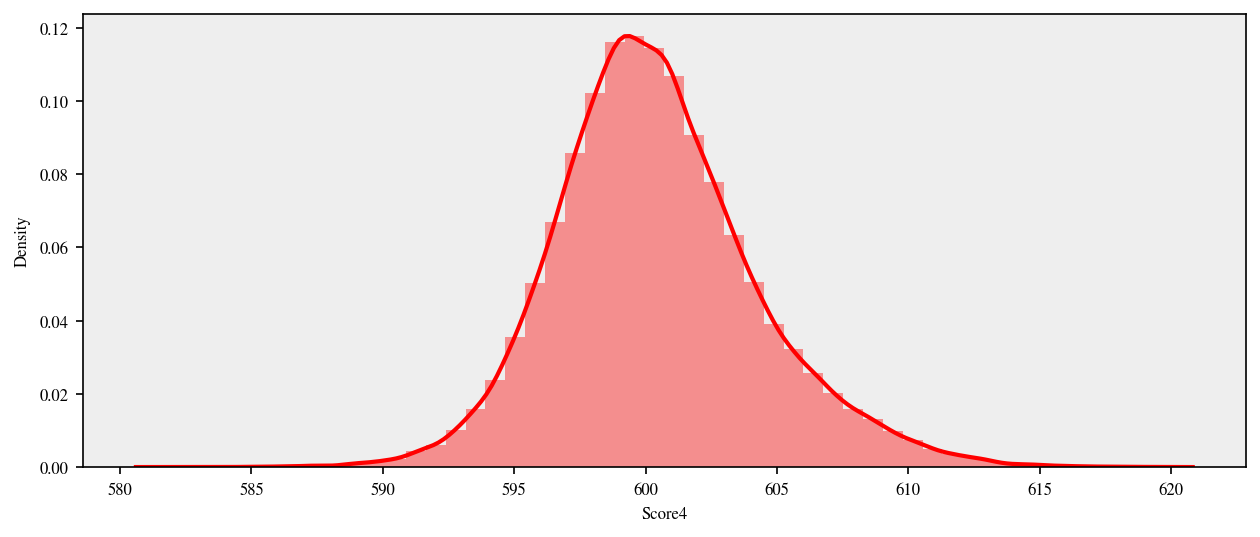

In [ ]:
sns.distplot(train['Score4'],hist=True,color='red')

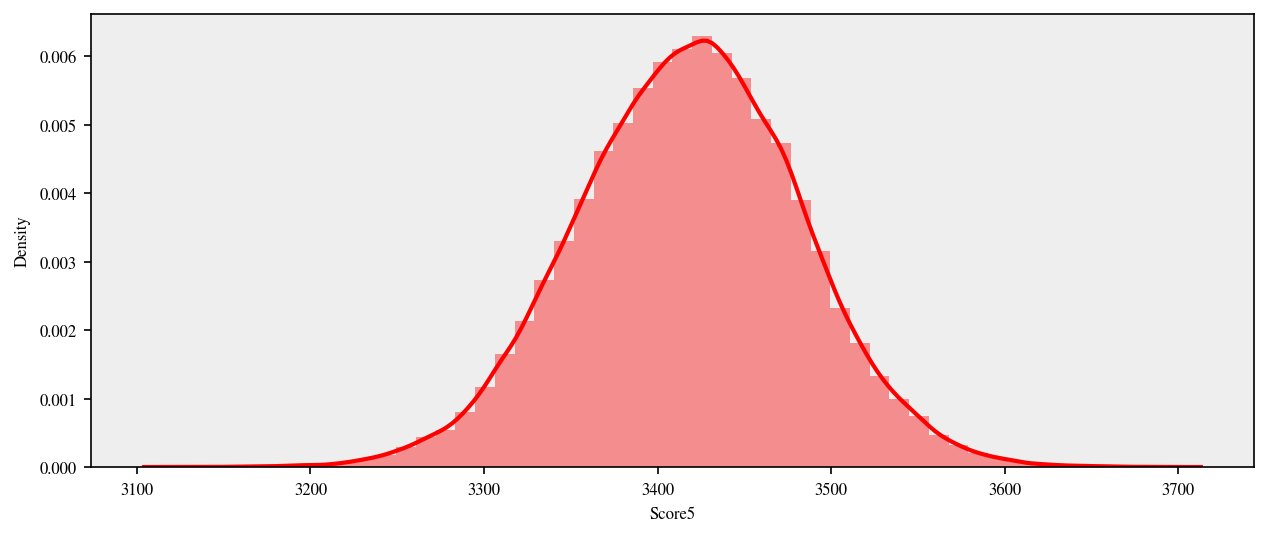

In [ ]:
sns.distplot(train['Score5'],hist=True,color='red')

### Basic EDA

In [12]:
target = 'Label'

In [13]:
train.columns

Index(['ID', 'Expense', 'Income', 'Loan type', 'Occupation type', 'Age',
       'Score1', 'Score2', 'Score3', 'Score4', 'Score5', 'Label'],
      dtype='object')

In [14]:
train[target].value_counts()

0.0    71064
1.0     5033
Name: Label, dtype: int64

In [15]:
def get_counts(df):
    print(df.shape)
    for i in df.columns:
        print('unique values of {} --> {} \n'.format(i, df[i].nunique()))

In [16]:
categorical, numeric = train.select_dtypes(include=[object]).columns, train.select_dtypes(include=[float,int]).columns


In [17]:
numeric

Index(['ID', 'Expense', 'Income', 'Age', 'Score1', 'Score2', 'Score3',
       'Score4', 'Score5', 'Label'],
      dtype='object')

In [18]:
get_counts(train[categorical])

(80000, 2)
unique values of Loan type --> 2 

unique values of Occupation type --> 3 



In [19]:
train[numeric].describe()

,ID,Expense,Income,Age,Score1,Score2,Score3,Score4,Score5,Label
count,80000.000000,77956.000000,78045.000000,77986.000000,78060.000000,77964.000000,78045.000000,78028.000000,78002.000000,76097.000000
mean,40000.500000,1733.993769,15641.112448,0.441105,0.187617,192.065584,9.365450,600.397742,3417.740403,0.066139
std,23094.155105,133.239147,1065.620737,0.496522,0.123509,28.558250,8.760134,3.826112,64.391844,0.248527
min,1.000000,1126.809192,11171.703240,0.000000,-0.563328,40.572797,-28.885235,581.806404,3124.413430,0.000000
25%,20000.750000,1644.263974,14925.658150,0.000000,0.112651,173.415940,3.514901,597.894759,3374.406833,0.000000
50%,40000.500000,1736.276720,15624.259290,0.000000,0.189877,191.056193,8.883862,600.095436,3418.793524,0.000000
75%,60000.250000,1824.376793,16346.084990,1.000000,0.265243,209.727593,14.746607,602.597131,3461.384283,0.000000
max,80000.000000,2309.129903,20728.915330,1.000000,0.705737,338.073551,50.691479,619.623108,3692.731924,1.000000


### Data Cleaning

In [20]:
train_y.isna().sum()

ID          0
Label    3903
dtype: int64

Need to drop the training points where Label is NaN

In [21]:
train = train[~train['Label'].isna()].reset_index(drop=True)

## Heat Map

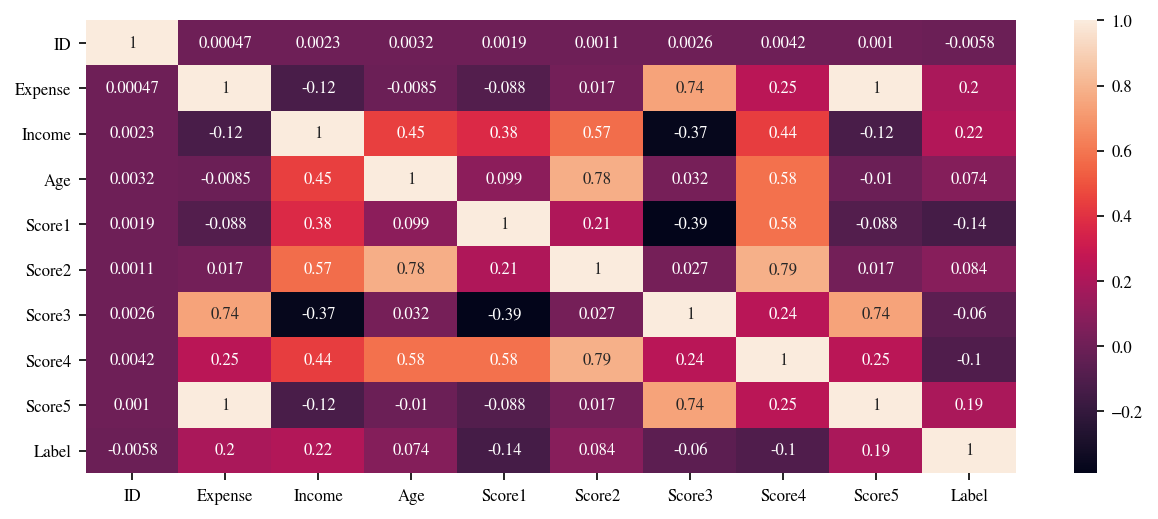

In [22]:
import seaborn as sns 
sns.heatmap(train.corr(),annot=True)

# IMPUTATION 

As a standard practice, Missing Income and Expense report suggest that the user profile is hidden at some extent, and we need to treat these datapoints as an outlier, so imputing the numeric data with -999 seems like a good choice

In [23]:
train.isna().sum()

ID                    0
Expense            1949
Income             1867
Loan type          1923
Occupation type    1781
Age                1909
Score1             1839
Score2             1941
Score3             1854
Score4             1874
Score5             1882
Label                 0
dtype: int64

In [24]:
for i in numeric:
    train[i] = train[i].fillna(-999)

In [25]:
train['Loan type']=train['Loan type'].fillna(train['Loan type'].mode()[0])
train['Occupation type']=train['Occupation type'].fillna(train['Occupation type'].mode()[0])
train.isna().sum()

ID                 0
Expense            0
Income             0
Loan type          0
Occupation type    0
Age                0
Score1             0
Score2             0
Score3             0
Score4             0
Score5             0
Label              0
dtype: int64

For Categorical, we just keep the NaNs, as the XGB/ LightGBM are capable of handling NaNs

In [26]:
train[target] = train[target].astype(int)

**Label Encoding the categorical**

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
train['is_train'] = 1
test['is_train'] = 0

merged = pd.concat([train,test]).reset_index(drop=True)

le1 = LabelEncoder()
merged['Loan type'] = le1.fit_transform(merged['Loan type'].astype(str))

le2 = LabelEncoder()
merged['Occupation type'] = le2.fit_transform(merged['Occupation type'].astype(str))

train = merged[merged['is_train']==1]
test = merged[merged['is_train']==0]

del train['is_train'], test['is_train']

In [29]:
data=pd.read_csv('train_x.csv')
data['Age'].unique()
data

,ID,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
0,1,1830.943788,14767.28013,B,Y,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291
1,2,1645.302546,15272.26775,B,Y,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455
2,3,1555.026392,17482.49734,A,Y,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886
3,4,NaN,16257.66493,A,Y,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849
4,5,1777.648916,16316.29914,B,X,1.0,NaN,224.074728,11.218489,605.947340,3438.864083
...,...,...,...,...,...,...,...,...,...,...,...
79995,79996,1470.317116,16659.49663,A,NaN,0.0,0.208757,172.526308,-5.332184,596.648261,3290.377932
79996,79997,1923.617480,14910.36890,B,Y,0.0,0.201837,186.252458,15.425841,600.855069,3509.388221
79997,79998,1711.147154,15962.25945,A,Y,1.0,0.226396,196.098150,8.161353,601.360722,3406.734018
79998,79999,1673.822523,15525.27413,B,Z,0.0,0.101090,186.390184,3.381393,596.750750,3388.700770


### Basic Model

Label 4 is dropped because of its high correlation with almost all features.

In [30]:
target_name="Label"
id_name="ID"

features_to_remove=to_drop = ['ID','Label','Score4']
features=train.columns.tolist()

features=[ fea for fea in  features if fea not in features_to_remove  ]

n = train[target_name].nunique()

In [31]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [32]:
from sklearn.model_selection import train_test_split
x_t, x_v, y_t, y_v = train_test_split(train[features],train[target_name],
                                      test_size=0.2, stratify=train
                                      [target_name], random_state=4343)


In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
model=XGBClassifier(n_estimators=200,max_depth=20,learning_rate=0.1)
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores=cross_val_score(model,x_t,y_t, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.983 (0.002)


In [34]:
model=XGBClassifier(n_estimators=200,max_depth=20,learning_rate=0.1)
model.fit(x_t,y_t)
y_hat = model.predict(x_v)
y_probab = model.predict_proba(x_v)[::,-1]

In [35]:
f1_score(y_hat,y_v)
accuracy_score(y_hat,y_v)

0.9840341655716163

In [36]:
confusion_matrix(y_hat,y_v)

array([[14166,   196],
       [   47,   811]])

> The key objective of solving this problem is to detect defaulting loans, hence true positives should be our focus

> As we know, this is problem suffers from great class imalance, so keepin 0.5 as decision threshold isn't plausible here. We need to lower the threshold, in order to obtain more true positives.

>We can built a custom function which tunes the threshold values ranging from 0 to 1, and finds the optimal one, where we have maximum F1-Score;

> But to make sure the quality of our probability predictions, we can use roc_auc_score, this allows us to compare multiple models wrt their probablity prediction quality, once we are sure of the highest roc_auc_score, we can tune predictions of that model wrt multiple thresholds

Let's Decide upon an optimal threshold



In [38]:
def optimal_f1_thresh(target, oofs):
    
    """
    Objective: Find optimal threshold, maximizing the F1-Score
    
    """
    thresholds = np.arange(0, 100)/100
    thresh_scores = []
    for thresh in thresholds:
        oofs_rounded = (oofs > thresh) * 1
        thresh_score = f1_score(target, oofs_rounded)
        thresh_scores.append(thresh_score)

    all_thresholds_scores = pd.Series(index=thresholds, data=thresh_scores)
    all_thresholds_scores.plot(figsize=(4, 2), fontsize=14)

    plt.xlabel("Threshold", fontsize=8)
    plt.ylabel("F1 score", fontsize=8)

    return all_thresholds_scores.sort_values(ascending=False).index.values[0]

0.21

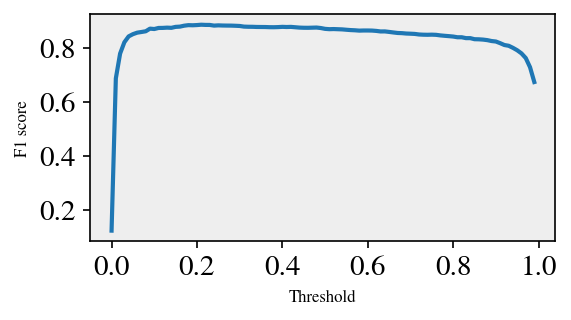

In [39]:
optimal_f1_thresh(y_v, y_probab)

There's an increase in Accuracy and improvement in F1 score after thresholding. 

In [40]:
accuracy_score((y_probab>0.21).astype(int),y_v)

0.9854139290407359

In [41]:
f1_score((y_probab>0.21).astype(int),y_v)

0.8849740932642487

In [42]:
confusion_matrix((y_probab>0.21).astype(int),y_v)

array([[14144,   153],
       [   69,   854]])

Yeah so it is indeed a rewarding approach!!

**For more FE insights, let's have a look at the feature importances**

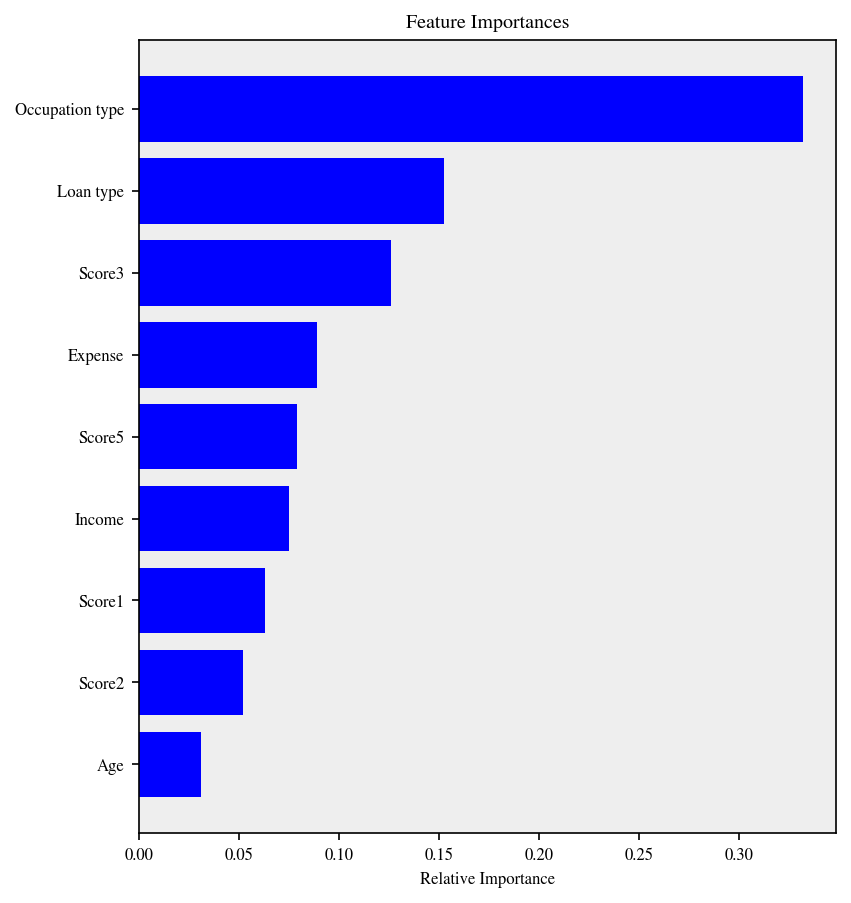

In [43]:
feat = x_t.columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feat[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Submission

In [44]:
model=XGBClassifier(n_estimators=200,max_depth=20,learning_rate=0.1)
model.fit(train[features],train[target_name])
y_probab_=model.predict_proba(test.drop(['ID','Label','Score4'],axis=1))[::,-1]
y_pred_=(y_probab_>0.21).astype(int)

In [45]:
test['Label']=y_pred_
sub=test[['ID','Label']]
sub.reset_index(drop=True, inplace=True)
sub.to_csv('pred_y_.csv',index=False, header=True)